In [ ]:
### Code for generating temporal gene expression heatmaps shown in Extended Data Figure 7

In [11]:
import pandas as pd
import gseapy 
import diffxpy.api as de
import warnings
import os
warnings.filterwarnings("ignore")

In [12]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [13]:
%%R
library(ggplot2)
library(gdata)
library(tidyr)
library(pheatmap)
library(tibble)
library(openxlsx)
library(clusterSim)
library(viridis)
library(dichromat)
library(RColorBrewer)

### Pseudobulk with d37 DGEs

In [14]:
%%R
logfc = "025"
ncluster = "11"
age = "old"
compartment = "pseudobulk"

c1_genes = read.csv(paste0("/home/michaelammeter/projects/aging/dge_splines/output/cluster_1_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c2_genes = read.csv(paste0("/home/michaelammeter/projects/aging/dge_splines/output/cluster_2_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c3_genes = read.csv(paste0("/home/michaelammeter/projects/aging/dge_splines/output/cluster_3_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c4_genes = read.csv(paste0("/home/michaelammeter/projects/aging/dge_splines/output/cluster_4_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c5_genes = read.csv(paste0("/home/michaelammeter/projects/aging/dge_splines/output/cluster_5_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c6_genes = read.csv(paste0("/home/michaelammeter/projects/aging/dge_splines/output/cluster_6_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c7_genes = read.csv(paste0("/home/michaelammeter/projects/aging/dge_splines/output/cluster_7_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c8_genes = read.csv(paste0("/home/michaelammeter/projects/aging/dge_splines/output/cluster_8_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c9_genes = read.csv(paste0("/home/michaelammeter/projects/aging/dge_splines/output/cluster_9_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c10_genes = read.csv(paste0("/home/michaelammeter/projects/aging/dge_splines/output/cluster_10_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c11_genes = read.csv(paste0("/home/michaelammeter/projects/aging/dge_splines/output/cluster_11_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)


c1_genes <- c1_genes[,1]
c2_genes <- c2_genes[,1]
c3_genes <- c3_genes[,1]
c4_genes <- c4_genes[,1]
c5_genes <- c5_genes[,1]
c6_genes <- c6_genes[,1]
c7_genes <- c7_genes[,1]
c9_genes <- c9_genes[,1]
c10_genes <- c10_genes[,1]
c11_genes <- c11_genes[,1]

In [15]:
%%R
pseudobulk_exp = read.csv("/media/HDD_1/David/LungAging/Splines_clustering/mean_expression_pseudobulk.csv",
                            row.names = 1)

pseudobulk_exp_old <- pseudobulk_exp[,7:12]
colnames(pseudobulk_exp_old) <- gsub("old_", "", colnames(pseudobulk_exp_old))

pseudobulk_exp_young <- pseudobulk_exp[,1:6]
colnames(pseudobulk_exp_young) <- gsub("young_", "", colnames(pseudobulk_exp_young))

head(pseudobulk_exp)

                  young_d0     young_d3    young_d10   young_d20    young_d30
0610005C13Rik 0.0004096108 0.0004425363 8.499916e-05 0.000417581 0.0001669096
0610009B22Rik 0.0054764547 0.0072335075 8.342048e-03 0.005473794 0.0073496680
0610009E02Rik 0.0019553886 0.0016353056 2.050692e-03 0.001394189 0.0028642747
0610009L18Rik 0.0039646410 0.0036877699 2.187992e-03 0.003763148 0.0018280994
0610010F05Rik 0.0236682630 0.0200612950 2.563014e-02 0.029140440 0.0292729050
0610010K14Rik 0.0029571240 0.0039616465 3.529876e-03 0.002945689 0.0032201582
                 young_d37      old_d0       old_d3      old_d10      old_d20
0610005C13Rik 0.0011192921 0.000506839 0.0005162548 0.0002106806 0.0004420795
0610009B22Rik 0.0031431166 0.005796074 0.0074475952 0.0100747190 0.0105922595
0610009E02Rik 0.0004456969 0.001488336 0.0022858190 0.0025060126 0.0014094330
0610009L18Rik 0.0011766149 0.004547974 0.0031714860 0.0027202263 0.0039562110
0610010F05Rik 0.0225881300 0.017539360 0.0162972880 0.0197559130

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


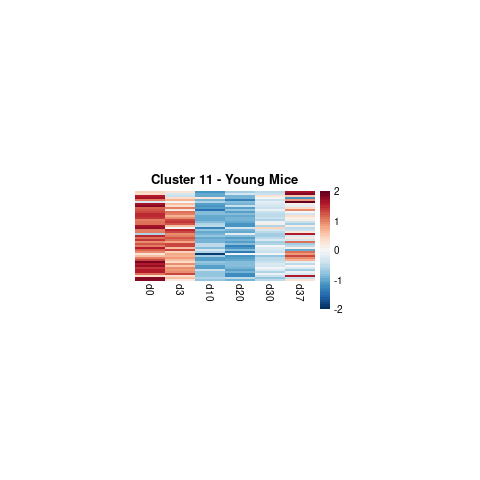

In [21]:
%%R
logfc = "025"
age = "old"
compartment = "pseudobulk_d37_dge"
output = "/home/michaelammeter/projects/aging/dge_splines/output/cluster_heatmaps/"

ncluster = "11"
cluster = 11

for (i in 1:cluster){
    cluster_genes <- read.csv(paste0("/home/michaelammeter/projects/aging/dge_splines/output/cluster_", i, "_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), 
                              sep = "\t", header = FALSE)
    cluster_genes <- cluster_genes[,1]

    old_mice <- as.data.frame(pseudobulk_exp_old[cluster_genes, ])
    old_mice <- apply(data.frame(old_mice), 1, scale)
    rownames(old_mice) <- c("d0", "d3", "d10", "d20", "d30", "d37")
    old_mice <- t(old_mice)

    plt_old <- pheatmap(mat = old_mice,
                        main = paste0("Cluster ", i, " - Old Mice"),
                        color = colorRampPalette(rev(brewer.pal(11, "RdBu")))(50),
                        breaks = seq(-2, 2, by = 0.08),
                        cellheight = 2,
                        cellwidth = 30,
                        cluster_cols = FALSE,
                        cluster_rows = TRUE,
                        show_rownames = FALSE)
    filename_old = paste0(output, "cluster_", i, "_old_mice" ,"_gene_expression_heatmap_logfc", logfc, "_dropNA_", compartment, "_", age, "_mice_ncluster", ncluster, ".pdf")
    ggsave(filename = filename_old, plot = plt_old, scale = 1)

    # Get the order of rows from the old heatmap
    row_order <- plt_old$tree_row$order

    young_mice <- as.data.frame(pseudobulk_exp_young[cluster_genes, ])
    young_mice <- apply(data.frame(young_mice), 1, scale)
    rownames(young_mice) <- c("d0", "d3", "d10", "d20", "d30", "d37")
    young_mice <- t(young_mice)

    # Reorder the young_mice matrix to match the order of old_mice
    young_mice <- young_mice[row_order, ]

    plt_young <- pheatmap(mat = young_mice,
                          main = paste0("Cluster ", i, " - Young Mice"),
                          color = colorRampPalette(rev(brewer.pal(11, "RdBu")))(50),
                          breaks = seq(-2, 2, by = 0.08),
                          cellheight = 2,
                          cellwidth = 30,
                          cluster_cols = FALSE,
                          cluster_rows = FALSE,
                          show_rownames = FALSE)
    filename_young = paste0(output, "cluster_", i, "_young_mice" ,"_gene_expression_heatmap_logfc", logfc, "_dropNA_", compartment, "_", age, "_mice_ncluster", ncluster, ".pdf")
    ggsave(filename = filename_young, plot = plt_young, scale = 1)
}